#### init

In [1]:
from AROMA import *
from AROMA.utils import *
from AROMA.config import *
import pandas as pd
from scipy.optimize import curve_fit

%matplotlib inline

pi = np.pi 

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx
print('def: find_nearest(array, value)')

def powerfunc_ten(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6,amp7,shift7,amp8,shift8,amp9,shift9,amp10,shift10):
    shifted1=amp1*shift(sinepw,shift1)
    shifted2=amp2*shift(sinepw,shift2)
    shifted3=amp3*shift(sinepw,shift3)
    shifted4=amp4*shift(sinepw,shift4)
    shifted5=amp5*shift(sinepw,shift5)
    shifted6=amp6*shift(sinepw,shift6)
    shifted7=amp1*shift(sinepw,shift7)
    shifted8=amp2*shift(sinepw,shift8)
    shifted9=amp3*shift(sinepw,shift9)
    shifted10=amp4*shift(sinepw,shift10)
    return shifted1+shifted2+shifted3+shifted4+shifted5+shifted6+shifted7+shifted8+shifted9+shifted10
print('def: powerfunc_ten(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6,amp7,shift7,amp8,shift8,amp9,shift9,amp10,shift10)')

def powerfunc_six(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6):
    shifted1=amp1*shift(sinepw,shift1)
    shifted2=amp2*shift(sinepw,shift2)
    shifted3=amp3*shift(sinepw,shift3)
    shifted4=amp4*shift(sinepw,shift4)
    shifted5=amp5*shift(sinepw,shift5)
    shifted6=amp6*shift(sinepw,shift6)
    return shifted1+shifted2+shifted3+shifted4+shifted5+shifted6
print('def: powerfunc_six(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6)')

def powerfunc_four(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4):
    shifted1=amp1*shift(sinepw,shift1)
    shifted2=amp2*shift(sinepw,shift2)
    shifted3=amp3*shift(sinepw,shift3)
    shifted4=amp4*shift(sinepw,shift4)
    return shifted1+shifted2+shifted3+shifted4
print('def: powerfunc_four(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4)')
      
def powerfunc(hpp,amp1,shift1,amp2,shift2,amp3,shift3):
    shifted1=amp1*shift(sinepw,shift1)
    shifted2=amp2*shift(sinepw,shift2)
    shifted3=amp3*shift(sinepw,shift3)
    return shifted1+shifted2+shifted3
print('def: powerfunc(hpp,amp1,shift1,amp2,shift2,amp3,shift3)')
      
def powerfuncsingle(hpp,amp1,shift1):
    shifted1=amp1*shift(sinepw,shift1)
    return shifted1
print('def: powerfuncsingle(hpp,amp1,shift1)')

import os
from os.path import join
array = os.path.abspath('').split('/')
homedir = '/'
for i in range(1,7):
   homedir = join(homedir, array[i])
homedir

import numpy.random as random
from astropy import units as u
import matplotlib.patches as patches
def: find_nearest(array, value)
def: powerfunc_six(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6)
def: powerfunc_four(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4)
def: powerfunc(hpp,amp1,shift1,amp2,shift2,amp3,shift3)
def: powerfuncsingle(hpp,amp1,shift1)
data_dir :  ~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data
data_path :  ~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data/processed/luhman_16ab_sector36-37.txt
plot_dir :  ~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/plots
def: find_nearest(array, value)
def: powerfunc_ten(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6,amp7,shift7,amp8,shift8,amp9,shift9,amp10,shift10)
def: powerfunc_six(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6)
def: powerfunc_four(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4)
def: powerfunc(hpp,

'/Users/nguyendat/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping'

#### Long Period Data

Original shape:  2676
Reduced shape at constant sampling rate=5:  536
####################
Integrated flux below 1:  5.393238563916512
Integrated flux above 1:  4.789235289570685


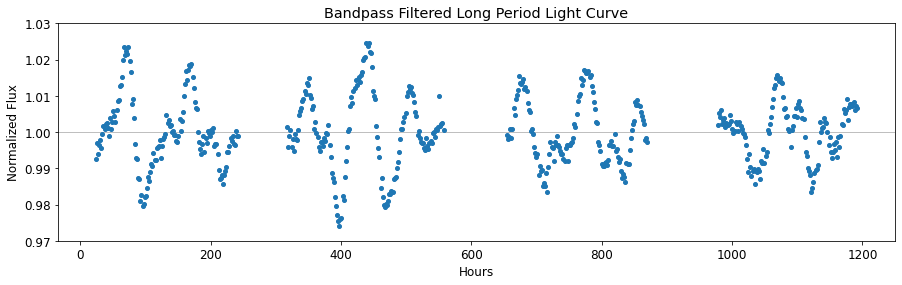

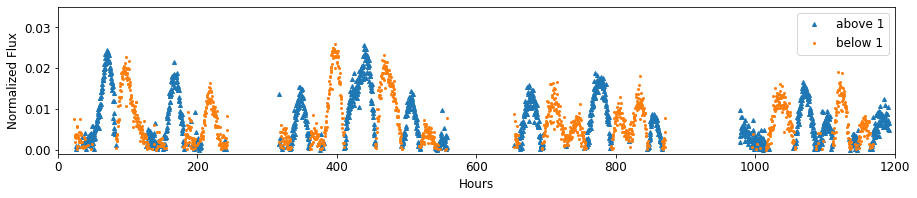

In [2]:
# %matplotlib widget
%matplotlib inline

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

## Saving
# save = True
save = False

data_path = "~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data/processed/longPeriod_FourierBandpassFILTER-window15-95_hour.txt"
time_info = data_path[-14:-4]
dataRaw = pd.read_csv(data_path, skiprows=1, names=['time', 'flux'], delimiter='\t')
plotPath = join(homedir, 'plots')

data = dataRaw.copy() # full light curve
fit_dir = join(homedir,'notebooks', 'periodSineFit_metadata')

# Constant rate sampling: sample data at every point i=rate (ie. skip 10 data point between next data)
rate=5
data = data[::rate]

time, lc = data.time, data.flux
# segments = [(30,80), (80,130), (130,180), (180,230)]
segments = [(0, 250), (310, 570), (630, 890), (960, 1200)]
plt.close('all')

print('Original shape: ', dataRaw.time.size)  
print('Reduced shape at constant sampling rate=%i: '%rate, data.time.size)  

above = dataRaw[dataRaw.flux>=1]
below = dataRaw[dataRaw.flux<1]
print('####################\nIntegrated flux below 1: ', np.trapz(x=below.time, y=-below.flux+1))
print('Integrated flux above 1: ', np.trapz(x=above.time, y=above.flux-1))

# plot filtered LC
plt.figure(figsize=(15, 4))
plt.axhline(y=1, xmin=0, xmax=1200, lw=0.5, c='k', alpha=0.5)
plt.plot(time, lc, ls='', marker='o', ms=4.0)
plt.xlabel('Hours'), plt.ylabel('Normalized Flux'), plt.title("Bandpass Filtered Long Period Light Curve"), plt.ylim((0.97, 1.03))

# plot flipping plot
f, ax = plt.subplots(figsize=(15, 2.7))
ax.set_ylim((-0.001,0.035)), ax.axhline(y=0, xmin=0, xmax=1200, lw=0.2, ls='--', c='k', alpha=0.2)
ax.set_xlim((0,1200))
ax.set_xlabel('Hours'), ax.set_ylabel('Normalized Flux')
ax.plot(above.time, above.flux-1, ls='', marker='^', ms=4.0, label='above 1')
ax.plot(below.time, -below.flux+1, ls='', marker='.', ms=4.0, label='below 1')
ax.legend()

if save: 
    plotOut = plotPath + '/LongPeriodLC_flippingCompare_%s_sector3637'%time_info
    print('/LongPeriodLC_flippingCompare_%s_sector3637'%time_info)
    f.savefig(plotOut+'.pdf', dpi=300, format='pdf', bbox_inches = 'tight')
    f.savefig(plotOut+'.png', dpi=300, format='png', bbox_inches = 'tight')

#### Pattern comparison grid plots

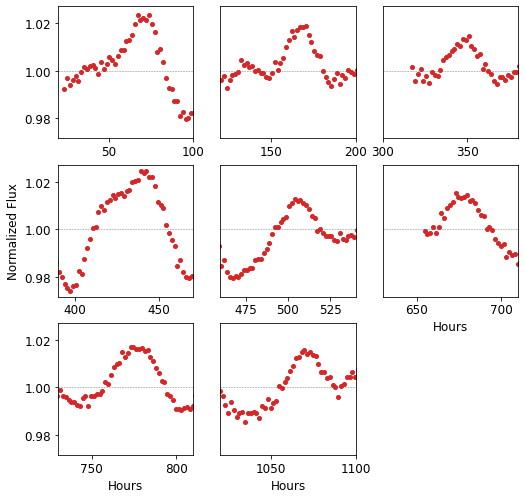

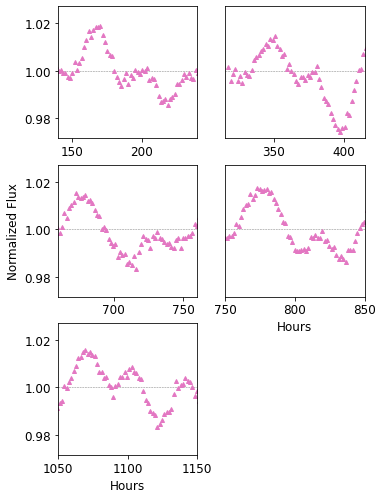

In [3]:
## Saving
# save = True
save = False

f, ax = plt.subplots(3, 3, figsize=(8.25, 8.25))
# f.tight_layout(pad=0.5)
segments = [(20,100), (120,200), (300,380), (390,470), (460,540), (630,710), (730,810), (1020,1100)]
axe = ax.flatten()

# peak-shape
for i, seg in enumerate(segments):
    axe[i].axhline(y=1, xmin=0, xmax=1200, lw=0.5, ls='--', c='k', alpha=0.5)
    axe[i].plot(time, lc, ls='', marker='o', c='tab:red', ms=4.0)
    axe[i].set_xlim(seg)
    if i%3 != 0: axe[i].set_yticks([])
    if i>4: axe[i].set_xlabel('Hours')
    if i==3: axe[i].set_ylabel('Normalized Flux')
    
f.delaxes(axe[-1])
if save:
    plotOut = plotPath + '/peakCompare_peakShape_longLC_%s_sector3637'%(time_info)
    print('/peakCompare_peakShape_longLC_%s_sector3637'%(time_info))
    f.savefig(plotOut+'.pdf', dpi=300, format='pdf', bbox_inches = 'tight')
    f.savefig(plotOut+'.png', dpi=300, format='png', bbox_inches = 'tight')

### W-shape
f2, ax2 = plt.subplots(3, 2, figsize=(5.5, 8.25))
# f.tight_layout(pad=0.5)
segments2 = [(140,240), (315,415), (660,760), (750,850), (1050, 1150)]
axe2 = ax2.flatten()

for i, seg2 in enumerate(segments2):
    axe2[i].axhline(y=1, xmin=0, xmax=1200, lw=0.5, ls='--', c='k', alpha=0.5)
    axe2[i].plot(time, lc, ls='', marker='^', c='tab:pink', ms=4.0)
    axe2[i].set_xlim(seg2)
    if i%2 != 0: axe2[i].set_yticks([])
    if i>2: axe2[i].set_xlabel('Hours')
    if i==2: axe2[i].set_ylabel('Normalized Flux')
    
f2.delaxes(axe2[-1])
if save:
    plotOut = plotPath + '/peakCompare_W-Shape_longLC_%s_sector3637'%(time_info)
    print('/peakCompare_W-Shape_longLC_%s_sector3637'%(time_info))
    f2.savefig(plotOut+'.pdf', dpi=300, format='pdf', bbox_inches = 'tight')
    f2.savefig(plotOut+'.png', dpi=300, format='png', bbox_inches = 'tight')

#### Pattern comparisons

##### peaks

((0.97, 1.03), (1020.0, 1100.0))

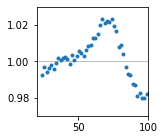

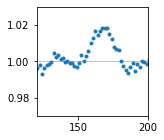

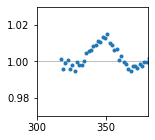

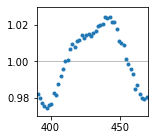

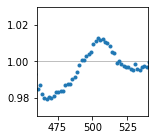

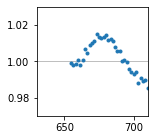

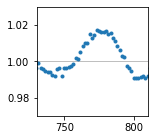

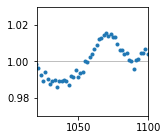

In [128]:
%matplotlib inline

plt.figure(figsize=(2,2))
plt.axhline(y=1, xmin=0, xmax=1200, lw=0.5, c='k', alpha=0.5)
plt.plot(time, lc, ls='', marker='o', ms=3.0)
plt.ylim((0.97, 1.03)), plt.xlim((20,100))

plt.figure(figsize=(2,2))
plt.axhline(y=1, xmin=0, xmax=1200, lw=0.5, c='k', alpha=0.5)
plt.plot(time, lc, ls='', marker='o', ms=3.0)
plt.ylim((0.97, 1.03)), plt.xlim((120,200))

plt.figure(figsize=(2,2))
plt.axhline(y=1, xmin=0, xmax=1200, lw=0.5, c='k', alpha=0.5)
plt.plot(time, lc, ls='', marker='o', ms=3.0)
plt.ylim((0.97, 1.03)), plt.xlim((300,380))

plt.figure(figsize=(2,2))
plt.axhline(y=1, xmin=0, xmax=1200, lw=0.5, c='k', alpha=0.5)
plt.plot(time, lc, ls='', marker='o', ms=3.0)
plt.ylim((0.97, 1.03)), plt.xlim((390,470))

plt.figure(figsize=(2,2))
plt.axhline(y=1, xmin=0, xmax=1200, lw=0.5, c='k', alpha=0.5)
plt.plot(time, lc, ls='', marker='o', ms=3.0)
plt.ylim((0.97, 1.03)), plt.xlim((460,540))

plt.figure(figsize=(2,2))
plt.axhline(y=1, xmin=0, xmax=1200, lw=0.5, c='k', alpha=0.5)
plt.plot(time, lc, ls='', marker='o', ms=3.0)
plt.ylim((0.97, 1.03)), plt.xlim((630,710))

plt.figure(figsize=(2,2))
plt.axhline(y=1, xmin=0, xmax=1200, lw=0.5, c='k', alpha=0.5)
plt.plot(time, lc, ls='', marker='o', ms=3.0)
plt.ylim((0.97, 1.03)), plt.xlim((730,810))

plt.figure(figsize=(2,2))
plt.axhline(y=1, xmin=0, xmax=1200, lw=0.5, c='k', alpha=0.5)
plt.plot(time, lc, ls='', marker='o', ms=3.0)
plt.ylim((0.97, 1.03)), plt.xlim((1020,1100))

##### buzzz

((0.98, 1.03), (1050.0, 1150.0))

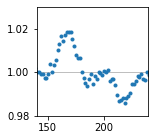

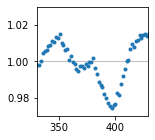

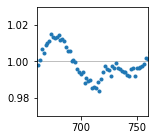

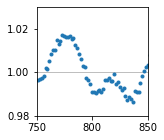

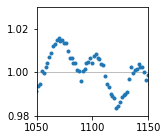

In [173]:
%matplotlib inline

plt.figure(figsize=(2,2))
plt.axhline(y=1, xmin=0, xmax=1200, lw=0.5, c='k', alpha=0.5)
plt.plot(time, lc, ls='', marker='o', ms=3.0)
plt.ylim((0.98, 1.03)), plt.xlim((140,240))

plt.figure(figsize=(2,2))
plt.axhline(y=1, xmin=0, xmax=1200, lw=0.5, c='k', alpha=0.5)
plt.plot(time, lc, ls='', marker='o', ms=3.0)
plt.ylim((0.97, 1.03)), plt.xlim((330,430))

plt.figure(figsize=(2,2))
plt.axhline(y=1, xmin=0, xmax=1200, lw=0.5, c='k', alpha=0.5)
plt.plot(time, lc, ls='', marker='o', ms=3.0)
plt.ylim((0.97, 1.03)), plt.xlim((660,760))

plt.figure(figsize=(2,2))
plt.axhline(y=1, xmin=0, xmax=1200, lw=0.5, c='k', alpha=0.5)
plt.plot(time, lc, ls='', marker='o', ms=3.0)
plt.ylim((0.98, 1.03)), plt.xlim((750,850))

plt.figure(figsize=(2,2))
plt.axhline(y=1, xmin=0, xmax=1200, lw=0.5, c='k', alpha=0.5)
plt.plot(time, lc, ls='', marker='o', ms=3.0)
plt.ylim((0.98, 1.03)), plt.xlim((1050,1150))

##### Gradient fits & Multisines

In [55]:
def sixsines(time, a1, p1, a2, p2, a3, p3, a4, p4, a5, p5, a6, p6, offset):
    periods = np.array([4.58, 4.68, 4.98, 5.21, 5.26, 5.34])
    om = 2*pi/periods
    
    sine1 = a1 * np.sin(om[0]*time + p1)
    sine2 = a2 * np.sin(om[1]*time + p2)
    sine3 = a3 * np.sin(om[2]*time + p3)
    sine4 = a4 * np.sin(om[3]*time + p4)
    sine5 = a5 * np.sin(om[4]*time + p5)
    sine6 = a6 * np.sin(om[5]*time + p6)
    fit = sine1 + sine2 + sine3 + sine4 + sine5 + sine6 + offset
    
    if not residual: 
        return fit
    else:
        res = np.sum( ((data-fit)/0.003)**2 )
        return (fit, res)

def threesines (time, a1, p1, a2, p2, a3, p3, offset):
    periods = np.array([4.68, 4.98, 5.26])
    om = 2*pi/periods
    
    sine1 = a1 * np.sin(om[0]*time + p1)
    sine2 = a2 * np.sin(om[1]*time + p2)
    sine3 = a3 * np.sin(om[2]*time + p3)
    fit = sine1 + sine2 + sine3
    
    return fit

[ 6.15615038e-17  5.43723504e+00  1.40356681e-02 -4.71135278e+00
  1.55662118e-02  1.34237496e+00  2.00000000e+00]


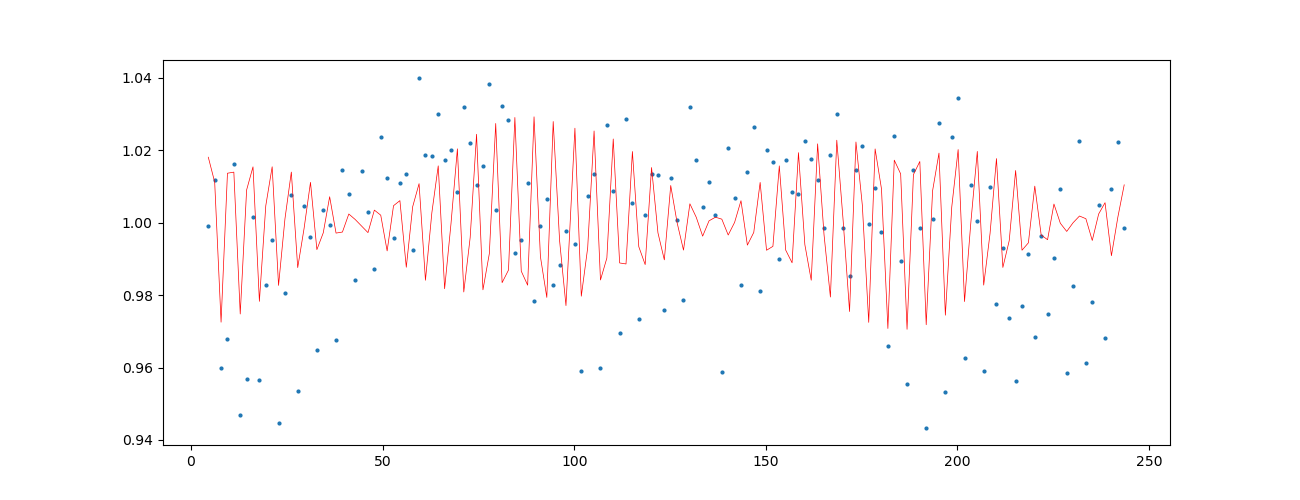

In [281]:
tlow, thigh = segments[0][0], segments[0][1]
# periods3 = np.array([4.68, 4.98, 5.26])
periods3 = np.array([4.68, 5.26, 5.34])
om3 = 2*pi/periods3

# a1, a2, a3 = 1,2,3
# p1, p2, p3 = 1,2,3
# plt.figure(figsize=(13,5)), plt.tight_layout()
# plt.plot(time, threesines(a1, p1, a2, p2, a3, p3, offset=0.5, time=time), ls='', marker='o', ms=2)

# guess = [1, 0.5, 
#          1, 0.5, 
#          1, 0.5, 
#          1]
lim = [(0, np.inf), (-np.inf, np.inf), 
       (0, np.inf), (-np.inf, np.inf), 
       (0, np.inf), (-np.inf, np.inf), 
       (0, np.inf)]
guesses=[0.5, -0.4, 0.5, 0.3, 0.5, -0.2, 2]

subset = data.query('TIME < %f & TIME >= %f'%(thigh, tlow))
timearr = subset.TIME
lcarr = subset.PSF_FLUX_NORM

popt, pcov = curve_fit(threesines, timearr, lcarr, p0=guesses, bounds=np.transpose(lim))
fit = threesines(timearr, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6]) + 1
print(popt)

plt.figure(figsize=(13,5)), plt.tight_layout()
plt.plot(timearr, lcarr, ls='', marker='o', ms=2)
plt.plot(timearr, fit, c='r', lw=0.5)

### hyperOPT Decision Tree, Sinusoidal model

In [56]:
import sklearn 
from sklearn.metrics import mean_squared_error, r2_score
from hyperopt import hp, tpe, Trials, fmin
import time
pi = np.pi

In [84]:
# choose time subset
tlow, thigh = segments[0] # (0, 250) hours
# tlow, thigh = segments[1] # (310, 570) hours
# tlow, thigh = segments[2] # (630, 890)
# tlow, thigh = segments[3] # (960, 1200)

subset = data.query('time < %f & time >= %f'%(thigh, tlow))[::5]

periods3 = np.array([2.5, 4.98, 5.26])
om3 = 2*pi/periods3
w1, w2, w3 = om3[0], om3[1], om3[2]
# w1, w2, w3 = 1.343, 1.262, 1.195
# w1, w2, w3 = 1.2778032980668326, 1.172107142815177, 2.7063490542229873

# known_freq = True # prescribe 3 known freq
known_freq = False # guess freq from fit

if known_freq:
    w1, w2, w3

In [85]:
# random split the data into train and test
x_data = subset.time
y_data = subset.flux
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5, random_state=42)

if known_freq:
    def objective(a0, a1, f1, a2, f2, a3, f3):
        """Objective function to minimize"""
        w1, w2, w3 = om3[0], om3[1], om3[2]
        return np.mean((a0+ a1 * np.sin(w1*X_train + f1) + a2 * np.sin(w2*X_train + f2) + a3 * np.sin(w3*X_train + f3) - y_train)**2)
    
    def objective2(args):
        return objective(*args)
else:
    def objective(a0, a1, f1, a2, f2, a3, f3, w1, w2, w3):
        """Objective function to minimize"""
        return np.mean((a0+ a1 * np.sin(w1*X_train + f1) + a2 * np.sin(w2*X_train + f2) + a3 * np.sin(w3*X_train + f3) - y_train)**2)

    def objective2(args):
        return objective(*args)

seed = 12345515
np.random.seed(seed)

In [87]:
from hyperopt import hp, tpe, Trials, fmin
from IPython.display import display, Math
bounds = [[0.99, 1.01],
          [0, 0.1],
          [-np.pi, np.pi],
          [0, 0.1],
          [-np.pi, np.pi],
          [0, 0.1],
          [-np.pi, np.pi],
          [2*pi/60, 2*pi/40],
          [2*pi/100, 2*pi/70],
          [2*pi/100, 2*pi/70]]

if known_freq:
    space = [hp.uniform('a0', bounds[0][0], bounds[0][1]),
             hp.uniform('a1', bounds[1][0], bounds[1][1]), 
             hp.uniform('f1', bounds[2][0], bounds[2][1]),
             hp.uniform('a2', bounds[3][0], bounds[3][1]), 
             hp.uniform('f2', bounds[4][0], bounds[4][1]),
             hp.uniform('a3', bounds[5][0], bounds[5][1]), 
             hp.uniform('f3', bounds[6][0], bounds[6][1])]
else:
    space = [hp.uniform('a0', bounds[0][0], bounds[0][1]),
             hp.uniform('a1', bounds[1][0], bounds[1][1]), 
             hp.uniform('f1', bounds[2][0], bounds[2][1]),
             hp.uniform('a2', bounds[3][0], bounds[3][1]), 
             hp.uniform('f2', bounds[4][0], bounds[4][1]),
             hp.uniform('a3', bounds[5][0], bounds[5][1]), 
             hp.uniform('f3', bounds[6][0], bounds[6][1]),
             hp.uniform('w1', bounds[7][0], bounds[7][1]),
             hp.uniform('w2', bounds[8][0], bounds[8][1]),
             hp.uniform('w3', bounds[9][0], bounds[9][1])]

In [88]:
redo = True
# redo = False
# maxeval = 5000
maxeval = 10000

if redo:
    tpe_algo = tpe.suggest
    tpe_trials = Trials()
    tpe_best = fmin(fn=objective2, space=space, algo=tpe_algo, trials=tpe_trials, max_evals=maxeval, rstate=np.random.default_rng(seed))
    
    handle_code = 'hyperOPT'
    if known_freq: handle_case = 'limFreq'
    else: handle_case = 'freeFreq'
    folder = join(homedir,'notebooks', 'lightCurveFit_metadata')
    filename = 'tpebestLongPeriod_%s_bandpassFILTER_%i_%i-hr_%s_fitMeta.pkl'%(handle_code, tlow, thigh, handle_case)
    import pickle
    with open(join(folder, filename), 'wb+') as file:
        pickle.dump(tpe_best, file, protocol=pickle.HIGHEST_PROTOCOL)
else:
    with open(join(folder, filename), 'rb') as file:
        tpe_read = pickle.load(file)
    tpe_best = tpe_read.copy()
    
if known_freq:
    print('Prescribed frequency')
    display(Math('\\omega_1={:.2f}, \\omega_2={:.2f}, \\omega_3={:.2f}'.format(*[w1, w2, w3])))

    print('Fitted parameters:')
    display(Math('a_0={a0:.5f}, a_1={a1:.2e}, \\phi_1={f1:.2f}, a_2={a2:.2e}, \\phi_2={f2:.2f}, a_3={a3:.2e}, \\phi_3={f3:.2f}'.format(**tpe_best)))
else:
    print('Fitted parameters:')
    display(Math('a_0={a0:.5f}, a_1={a1:.2e}, \\phi_1={f1:.2f}, a_2={a2:.2e}, \\phi_2={f2:.2f}, a_3={a3:.2e}, \\phi_3={f3:.2f}, \\omega_1={w1:.2f}, \\omega_2={w2:.2f}, \\omega_3={w3:.2f}'.format(**tpe_best)))

100%|█| 10000/10000 [15:55<00:00, 10.47trial/s, best loss: 1.5762910212724944e-0
Fitted parameters:


<IPython.core.display.Math object>

Fitted parameters:


<IPython.core.display.Math object>

44.335, 83.483, 70.433
0.142, 0.075, 0.089
{'a0': 1.0004514770153743, 'a1': 0.006391089737541961, 'a2': 0.01687818234383607, 'a3': 0.014151613733287395, 'f1': 3.019931875069881, 'f2': 2.191352797883217, 'f3': 3.1398466546443133, 'w1': 0.14171971833250174, 'w2': 0.0752632351486688, 'w3': 0.08920738667152851}


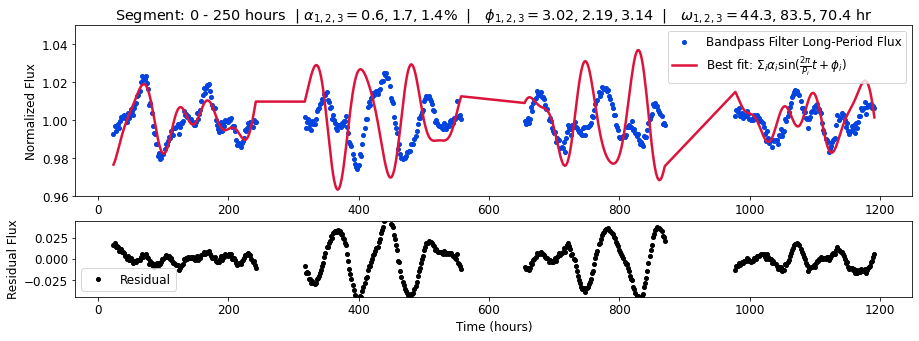

In [93]:
# Test
from sklearn.metrics import mean_squared_error, r2_score

# thigh, tlow= 450, 400
# thigh, tlow= 433, 409
# subset = data.query('time < %f & time >= %f'%(thigh, tlow))
subset = data.query('time < %f & time >= %f'%(1200, tlow))

x_data = subset.time
y_data = subset.flux
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=42)

if known_freq:
    ypred = tpe_best['a0']+ tpe_best['a1'] * np.sin(w1 * X_test + tpe_best['f1']) +tpe_best['a2'] * np.sin(w2 * X_test + tpe_best['f2']) +tpe_best['a3'] * np.sin(w3 * X_test + tpe_best['f3'])
    y = tpe_best['a0'] + tpe_best['a1'] * np.sin(w1* x_data + tpe_best['f1']) + tpe_best['a2'] * np.sin(w2 * x_data + tpe_best['f2']) + tpe_best['a3'] * np.sin(w3 * x_data + tpe_best['f3'])
else:
    ypred = tpe_best['a0']+ tpe_best['a1'] * np.sin(tpe_best['w1'] * X_test + tpe_best['f1']) +tpe_best['a2'] * np.sin(tpe_best['w2'] * X_test + tpe_best['f2']) +tpe_best['a3'] * np.sin(tpe_best['w3'] * X_test + tpe_best['f3'])
    y =  tpe_best['a0'] + tpe_best['a1'] * np.sin(tpe_best['w1']* x_data + tpe_best['f1']) + tpe_best['a2'] * np.sin(tpe_best['w2'] * x_data + tpe_best['f2']) + tpe_best['a3'] * np.sin(tpe_best['w3'] * x_data + tpe_best['f3'])    

tpelist = [tpe_best[key] for key in tpe_best][1:]    

# rmse = mean_squared_error(y_test,ypred)
# r2 = r2_score(y_test,ypred)
# print('mse:', rmse)
# print('r2:',r2)

residual = y_data - y

tryFit_residual = False
if tryFit_residual: 
    def sine(a,w,f,t): return a*np.sin(w*t +f)
    guesses = [0.02, 2*pi/15, 0]
    limits = [(0.,0.05), (2*pi/30, 2*pi/5), (0, pi)]
    pfit, cov = curve_fit(sine, x_data, residual, p0=guesses, bounds=np.transpose(limits))
    residualFit = sine(pfit[0], pfit[1], pfit[2], x_data)

txtsize = 12
headersize = 15
lw_data=2.5
lw_other=2.5
ms=4

backgroundcolor = 'xkcd:orange'
backgroundalpha = 0.1    
### Plotting
plt.close()
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

f, (a0, a1) = plt.subplots(2, 1, figsize = (15,5), gridspec_kw={'height_ratios': [1.8, 0.8]})
a0.plot(x_data, y_data, label='Bandpass Filter Long-Period Flux', ls='', marker='o', ms=ms, c='xkcd:blue')
a0.plot(x_data, y, label=r'Best fit: $\Sigma_i \alpha_i \sin(\frac{2\pi}{P_i}t + \phi_i)  $',
        lw=lw_data, c='crimson')
a0.set_ylim((0.96, 1.05))
a0.set_ylabel('Normalized Flux')
# a0.set_xlabel('Time (hours)')

a0.legend()
a0.set_title('Segment: %i - %i hours  | '%(tlow, thigh) + r'$\alpha_{1,2,3}=%.1f, %.1f, %.1f$%%' %(tpelist[0]*100, tpelist[1]*100, tpelist[2]*100) + 
          r'  |   $\phi_{1,2,3}=%.2f, %.2f, %.2f$' %(tpelist[3], tpelist[4], tpelist[5]) +
          r'  |   $\omega_{1,2,3}=%.1f, %.1f, %.1f$ hr'   %(2*pi/tpelist[6], 2*pi/tpelist[7], 2*pi/tpelist[8]) )

a1.plot(x_data, residual, label='Residual', ls='', marker='o', ms=4, c='k')
if tryFit_residual: plt.plot(x_data, residualFit, label='Fit: sine, (a=%.1f, P=%i hour, f=%.1f)'%(pfit[0]*100, 2*pi/pfit[1], pfit[2]), lw=1, c='b')
a1.legend()
a1.set_ylim((-0.045,0.045))
a1.set_xlabel('Time (hours)')
a1.set_ylabel('Residual Flux')

## Saving
save = True
# save = False

if save:
    handle_code = 'hyperOPT'
    if known_freq: handle_case = 'limFreq'
    else: handle_case = 'freeFreq'
    plotOut = plotPath + '/LongPeriod_%s_sector3637_%i_%i-hr_%s_fit'%(handle_code, tlow, thigh, handle_case)
    plt.savefig(plotOut+'.pdf', dpi=300, format='pdf', bbox_inches = 'tight')
    plt.savefig(plotOut+'.png', dpi=300, format='png', bbox_inches = 'tight')

if known_freq:
    print('Prescribed frequency')
    display(Math('\\omega_1={:.2f}, \\omega_2={:.2f}, \\omega_3={:.2f}'.format(*[w1, w2, w3])))

    print('Fitted parameters:')
    display(Math('a_0={a0:.5f}, a_1={a1:.2e}, \\phi_1={f1:.2f}, a_2={a2:.2e}, \\phi_2={f2:.2f}, a_3={a3:.2e}, \\phi_3={f3:.2f}'.format(**tpe_best)))
else:
    w1, w2, w3 = tpe_best['w1'], tpe_best['w2'], tpe_best['w3']
    print('Fitted parameters:')
    display(Math('a_0={a0:.5f}, a_1={a1:.2e}, \\phi_1={f1:.2f}, a_2={a2:.2e}, \\phi_2={f2:.2f}, a_3={a3:.2e}, \\phi_3={f3:.2f}, \\omega_1={w1:.2f}, \\omega_2={w2:.2f}, \\omega_3={w3:.2f}'.format(**tpe_best)))
    
print('%.3f, %.3f, %.3f'%(2*pi/w1, 2*pi/w2, 2*pi/w3))
print('%.3f, %.3f, %.3f'%(w1, w2, w3))
print(tpe_best)

#### PLOT EXTENSION OF FIT

In [ ]:
### Define before and after regions of main fit
value = 20
exten = data.query('TIME < %f & TIME >= %f'%(thigh+value, tlow-value))
timext = np.array(exten.TIME)
lcxt = np.array(exten.lc_corrected)
lcxt_err = 0.05*np.array(exten.lc_corrected)

timearr0 = data.query('TIME < %f & TIME >= %f'%(t0[1], t0[0])).TIME
flux0 = data.query('TIME < %f & TIME >= %f'%(t0[1], t0[0])).lc_corrected

timearr1 = data.query('TIME < %f & TIME >= %f'%(t1[1], t1[0])).TIME
flux1 = data.query('TIME < %f & TIME >= %f'%(t1[1], t1[0])).lc_corrected

best_fit_ext = 1 +  theta_max[0] * np.sin(theta_max[6] * timext + theta_max[1]) + \
                    theta_max[2] * np.sin(theta_max[7] * timext + theta_max[3]) + \
                    theta_max[4] * np.sin(theta_max[8] * timext + theta_max[6])
best_fit_main = 1 + theta_max[0] * np.sin(theta_max[6] * time + theta_max[1]) + \
                    theta_max[2] * np.sin(theta_max[7] * time + theta_max[3]) + \
                    theta_max[4] * np.sin(theta_max[8] * time + theta_max[6])
    
### Plot everything    
plt.close()
f, (a0, a1) = plt.subplots(2, 1, figsize = (15,4), gridspec_kw={'height_ratios': [2, 1]})
a0.plot(timext, lcxt, ls='', marker='o', ms=3, c='xkcd:blue')
# plot main fit period
a0.plot(time, best_fit_main, lw=5, c='xkcd:red')
a0.plot(timext, best_fit_ext, lw=2, c='xkcd:red')

rect = plt.Rectangle((tlow, 0.9), thigh-tlow, 0.2, color='xkcd:orange', alpha=0.2)
a0.add_patch(rect)
a0.set_xlim((tlow-value, thigh+value))
a0.set_ylim((0.940, 1.080))

font = {'color':  'k',
        'weight': 'normal',
        'size': 15,}
a0.text(x=35, y=1.05, s='%i-%i hours fit'%(tlow, thigh), fontdict=font)
a0.set_ylabel('Normalized Flux')

a1.plot(timext, lcxt - best_fit_ext, ls='', marker='o', ms=3, c='k')
a1.set_ylim((-0.08,0.08))
a1.set_xlim((tlow-value, thigh+value))
rect2 = plt.Rectangle((tlow, -0.1), thigh-tlow, 0.2, color='xkcd:orange', alpha=0.2)
a1.add_patch(rect2)
a1.set_ylabel('Residual Flux')
a1.set_xlabel('Time (hours)')

### Saving
save = False
if save:
    handle_code = 'MCMC'
    plotOut = plotPath + '/extended_%s_sector3637_%i_%i-hr_fit'%(handle_code, tlow, thigh)
    f.savefig(plotOut+'.pdf', dpi=300, format='pdf', bbox_inches = 'tight')
    f.savefig(plotOut+'.png', dpi=300, format='png', bbox_inches = 'tight')

plt.show()